In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import metacells as mc
import numpy as np
import os
import pandas as pd
import scipy.sparse as sp
import seaborn as sb

from math import hypot
from matplotlib.collections import LineCollection
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')
sb.set_style("white")

/tmp/6947055.1.all.q/ipykernel_57008/597048702.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
os.getcwd()

'/net/mraid14/export/tgdata/users/markusm/exe-gastrulation/notebooks/Bmp4'

In [3]:
os.chdir("../../")

In [4]:
os.getcwd()

'/net/mraid14/export/tgdata/users/markusm/exe-gastrulation'

In [5]:
raw = ad.read_h5ad('mc2/embexe_bmp4_og2_cells.h5ad')

In [6]:
mc.ut.set_name(raw, 'embexe_bmp4_og2')
print(raw.shape)

(120641, 30324)


In [7]:
excluded_gene_names = ["Neat1", "Xist", "Malat1", "AK140265","AK018753","AK163440","DQ539915","AK131586","AK131579","AK142750","X57780","GU332589","BC071253"]
excluded_gene_patterns = [
#     '^IGJ', '^IGH', '^IGK', '^IGL', 'MT-*', "^MTMR*", '^MTRNR*', '^MTND*',  
    'ERCC*', 
#     'hotspot*', 
#     'LOC*'
]

In [8]:
%%time
mc.pl.analyze_clean_genes(raw,
                          excluded_gene_names=excluded_gene_names,
                          excluded_gene_patterns=excluded_gene_patterns,
                          random_seed=123456)

AttributeError: module 'metacells.pipeline' has no attribute 'analyze_clean_genes'

In [9]:
%%time
mc.pl.pick_clean_genes(raw)

AttributeError: module 'metacells.pipeline' has no attribute 'pick_clean_genes'

In [10]:
from collections import Counter
Counter(raw.var.clean_gene)

AttributeError: 'DataFrame' object has no attribute 'clean_gene'

In [ ]:
%%time
# raw.write('full_embexe.h5ad')
full = raw

In [ ]:
%%time
properly_sampled_min_cell_total =  1500
properly_sampled_max_cell_total = 20000

total_umis_of_cells = mc.ut.get_o_numpy(full, name='__x__', sum=True)

plot = sb.distplot(total_umis_of_cells)
plot.set(xlabel='UMIs', ylabel='Density', yticks=[])
plot.axvline(x=properly_sampled_min_cell_total, color='darkgreen')
plot.axvline(x=properly_sampled_max_cell_total, color='crimson')

too_small_cells_count = sum(total_umis_of_cells < properly_sampled_min_cell_total)
too_large_cells_count = sum(total_umis_of_cells > properly_sampled_max_cell_total)

too_small_cells_percent = 100.0 * too_small_cells_count / len(total_umis_of_cells)
too_large_cells_percent = 100.0 * too_large_cells_count / len(total_umis_of_cells)

print(f"Will exclude %s (%.2f%%) cells with less than %s UMIs"
      % (too_small_cells_count,
         too_small_cells_percent,
         properly_sampled_min_cell_total))
print(f"Will exclude %s (%.2f%%) cells with more than %s UMIs"
      % (too_large_cells_count,
         too_large_cells_percent,
         properly_sampled_max_cell_total))

In [ ]:
np.median(total_umis_of_cells)

In [ ]:
%%time
properly_sampled_max_excluded_genes_fraction = 0.12

excluded_genes_data = mc.tl.filter_data(full, var_masks=['~clean_gene'])[0]
excluded_umis_of_cells = mc.ut.get_o_numpy(excluded_genes_data, name='__x__', sum=True)
excluded_fraction_of_umis_of_cells = excluded_umis_of_cells / total_umis_of_cells

plot = sb.distplot(excluded_fraction_of_umis_of_cells)
plot.set(xlabel='Fraction of excluded gene UMIs', ylabel='Density', yticks=[])
plot.axvline(x=properly_sampled_max_excluded_genes_fraction, color='crimson')

too_excluded_cells_count = sum(excluded_fraction_of_umis_of_cells > properly_sampled_max_excluded_genes_fraction)

too_excluded_cells_percent = 100.0 * too_excluded_cells_count / len(total_umis_of_cells)

print(f"Will exclude %s (%.2f%%) cells with more than %.2f%% excluded gene UMIs"
      % (too_excluded_cells_count,
         too_excluded_cells_percent,
         100.0 * properly_sampled_max_excluded_genes_fraction))

In [ ]:
%%time
mc.pl.analyze_clean_cells(
    full,
    properly_sampled_min_cell_total=properly_sampled_min_cell_total,
    properly_sampled_max_cell_total=properly_sampled_max_cell_total,
    properly_sampled_max_excluded_genes_fraction=properly_sampled_max_excluded_genes_fraction)

In [ ]:
%%time
mc.pl.pick_clean_cells(full)

In [ ]:
%%time
clean = mc.pl.extract_clean_data(full)

In [6]:
%%time
suspect_gene_names = [
    "A2m", "AA465934;AI450353", "AK021383;Prrc2c", "AK033756;Rab3il1", "AK087340;Eif3a", "AK156288;Tpd52", "AK158346;Snrpd2", "AK164737;Ell2", "AK165270;Rbm25", "AK196308;Tuba1b", "AK202516;P4hb", "AK204572;Eef1a1", "Acsl3;Utp14b", "Alad", "Aldoa", "Ankrd11", "Arl6ip1", "Atp5j", "Atrx", "Bst2", "Calr", "Cap1", "Cbx7", "Ccdc155", "Ccnb1", "Ccne1", "Cenpe", "Cenpf", "Chchd10", "Chd4;Mir7045", "Cox7b", "Cox7c", "Cox8a", "Cpox", "Csf2rb;Mir7676-2", "Ddx21", "Dek", "Dmkn", "Dsg2", "Eif5a", "Eif5b", "Erv3", "F11r", "Fblim1", "Fech", "Glrx5", "Gm12338", "Gm15772;Rpl26", "Gm1821", "Gprc5a", "Gpx1", "Gse1", "Hbb-b2", "Hdac6", "Hdgf", "Hist1h1a", "Hist1h1b", "Hist1h1c", "Hist1h1d", "Hist1h1e", "Hist1h2ae", "Hmmr", "Hsp90aa1", "Hsp90ab1", "Hsp90b1", "Hspa5", "Hspa8", "Hspe1", "Il1r2", "Isyna1", "Kif20b", "Kmt2a", "Ldha", "Ly6a", "Ly6c1", "Manf", "Mbnl1", "Mir6236", "Mir7079;Rpl13", "Mki67", "Msh6", "Naca", "Nasp", "Ncl", "Npm1", "Pdia6", "Pfn1", "Pkm", "Plekhf2", "Pnpo", "Prc1", "Prdx2", "Prmt1", "Prpf40a", "Psip1", "Psmb10", "Ptma", "Pttg1", "Rab15", "Rell1", "Rn45s", "Rpl14-ps1", "Rpl22l1", "Rpl23", "Rpl32", "Rpl37", "Rpl38", "Rpl41", "Rpl7", "Rplp0", "Rplp1", "Rps10", "Rps11", "Rps14", "Rps15", "Rps15a-ps6", "Rps18", "Rps2", "Rps20", "Rps21", "Rps25", "Rps26", "Rps27l", "Rps4l", "Rps5", "Rpsa", "Rrm2", "S100a4", "S100a8", "Slc14a1", "Slc16a3", "Slc6a12", "Smc4", "Smox", "Soat1", "Son", "Spint1", "Spns2", "Srrm2", 
#     "Ssx2ip", 
    "Tac2", "Tfrc", "Tjp2", "Tmem14c", "Top1", "Top2a", "Tpr", "Tubb5", "Ubb", "Ube2c", "Ung", "Hspb1", "Hspb8"
    
#     Hbb-bs, # 1e-3
    "Hbb-y",  # 2e-2
#     Hbb-b2, # 2e-4
    "Hba-a2", # 1e-2
    "Hba-x",  # 4e-2
    "Hbb-bh1",# 1e-1
]
suspect_gene_patterns = [ 'MCM[0-9]', 'SMC[0-9]', 'IFI.*', 'Hist1*.', 'HSP90.+' , 'COX.+']
# suspect_gene_patterns = ['MCM[0-9]', 'SMC[0-9]', 'IFI.*', 'Hist1*.', 'HSP*' , 'COX.+']
suspect_genes_mask = mc.tl.find_named_genes(clean, names=suspect_gene_names,
                                            patterns=suspect_gene_patterns)
suspect_gene_names = sorted(clean.var_names[suspect_genes_mask])

NameError: name 'clean' is not defined

In [23]:
%%time
mc.pl.relate_genes(clean, random_seed=123456, 
                   genes_similarity_method="pearson")#, min_genes_of_modules=)
# method in ("pearson", "repeated_pearson", "logistics", "logistics_pearson")

set embexe_bmp4_og2.clean.var[related_genes_module]: 21514 outliers (91.74%) out of 23450 int32 elements with 138 groups with mean size 14.03
set embexe_bmp4_og2.clean.varp[related_genes_similarity]: csr_matrix 23450 X 23450 float32s (3748096 > 0)


CPU times: user 1min 26s, sys: 9.7 s, total: 1min 36s
Wall time: 9.53 s


In [24]:
module_of_genes = clean.var['related_genes_module']
suspect_gene_modules = np.unique(module_of_genes[suspect_genes_mask])
suspect_gene_modules = suspect_gene_modules[suspect_gene_modules >= 0]
print(suspect_gene_modules)

[  8  11  17  32  36  50  51  54  63  65  68  69  70  72  73  75  80  82
  87  88  90  91  92  93  98 102 103 105 107 113 117 122 131 134 135 136
 137]


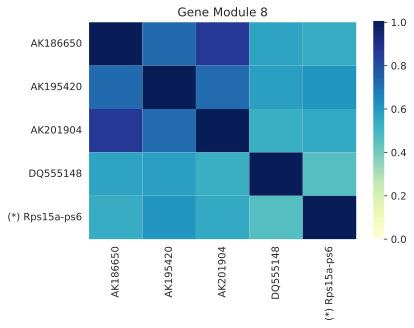

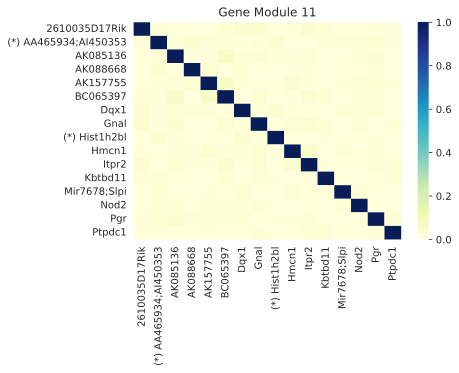

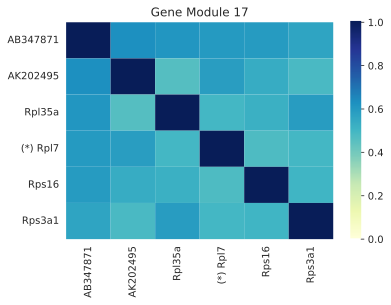

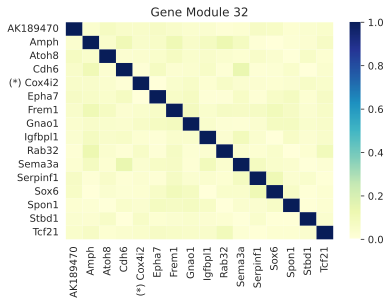

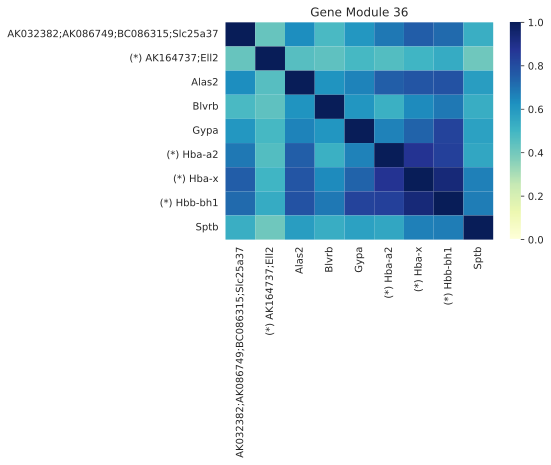

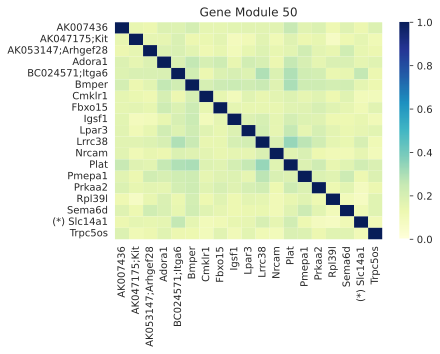

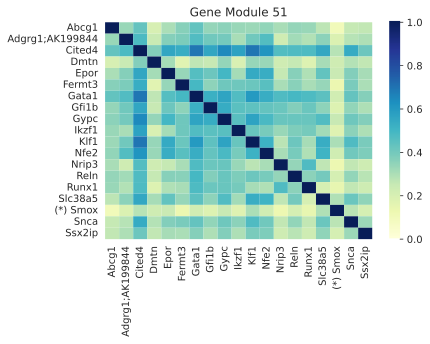

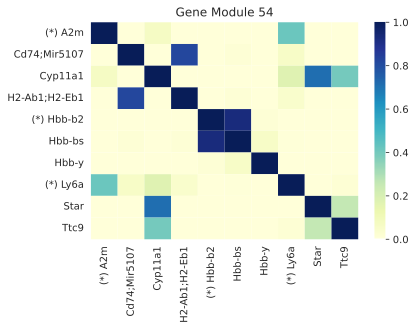

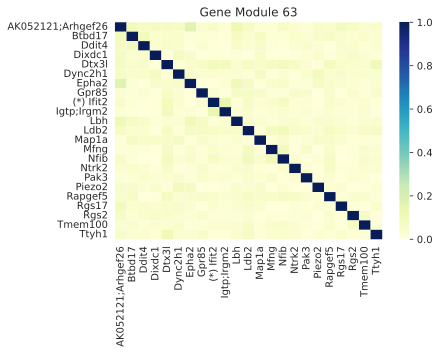

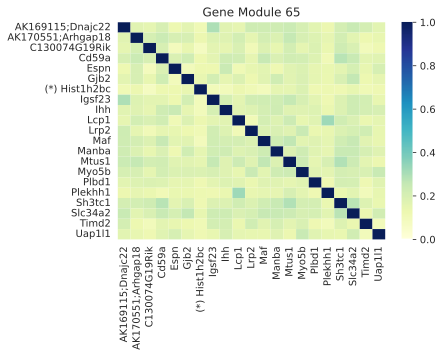

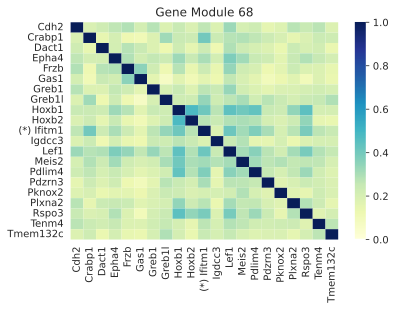

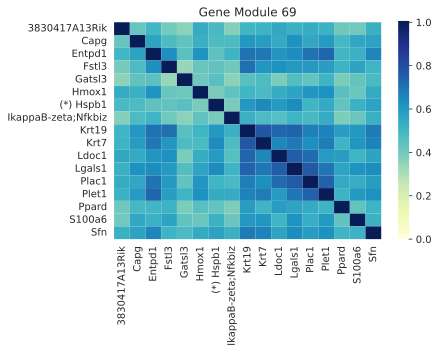

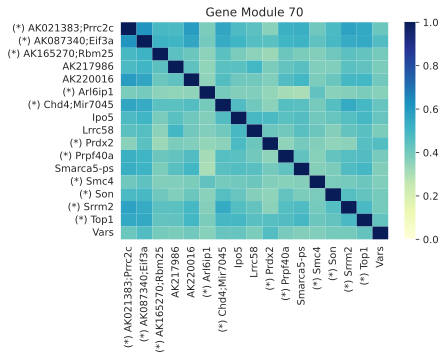

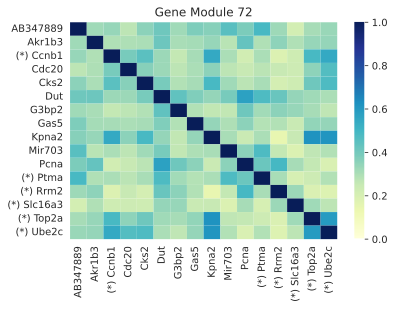

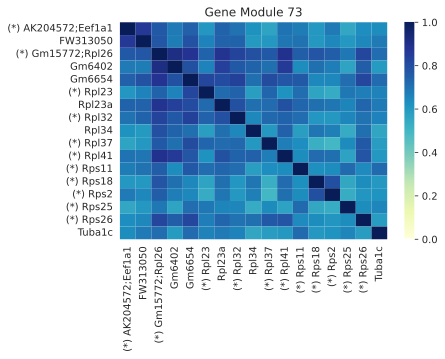

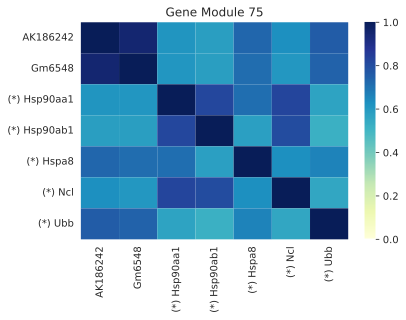

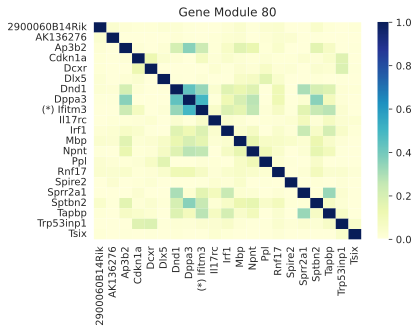

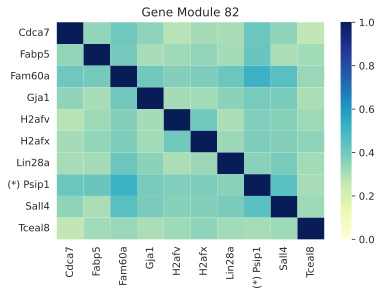

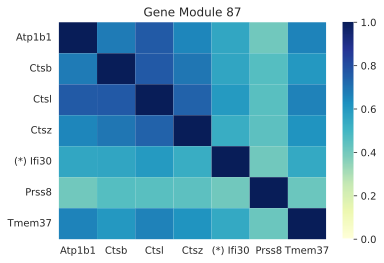

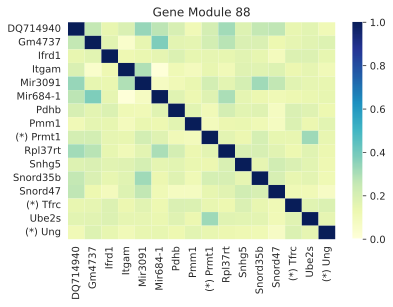

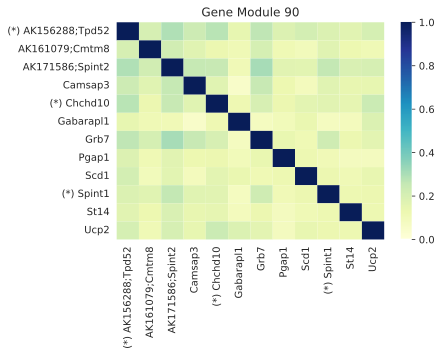

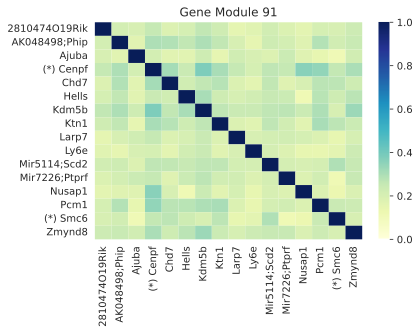

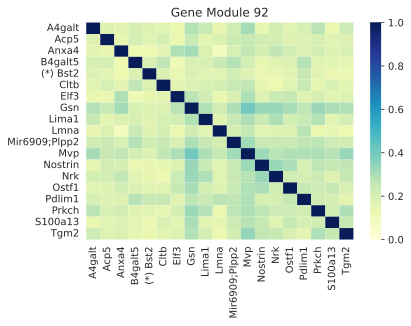

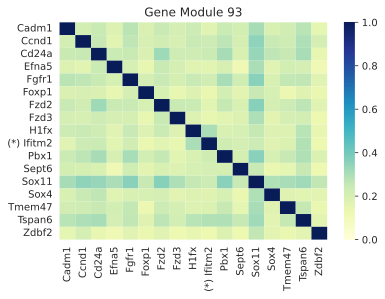

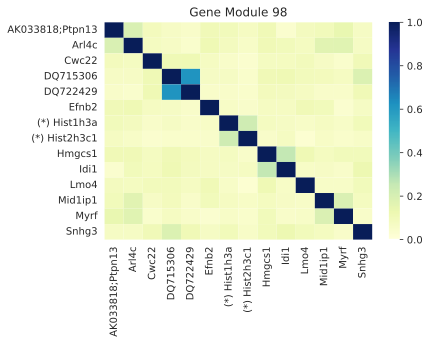

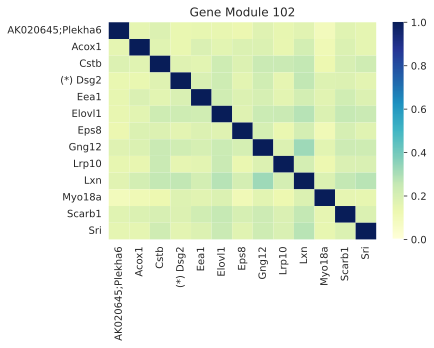

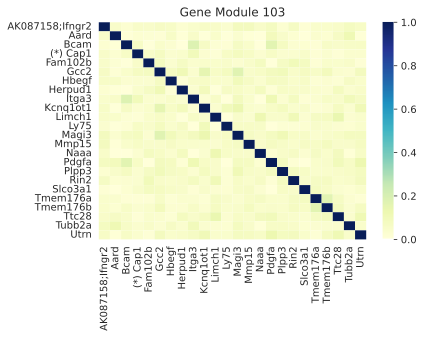

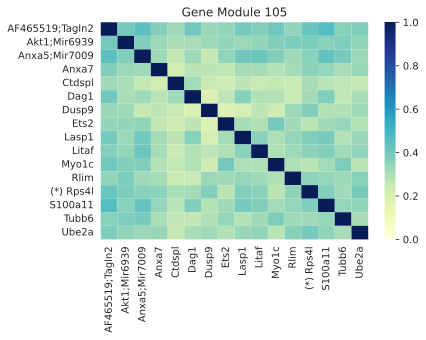

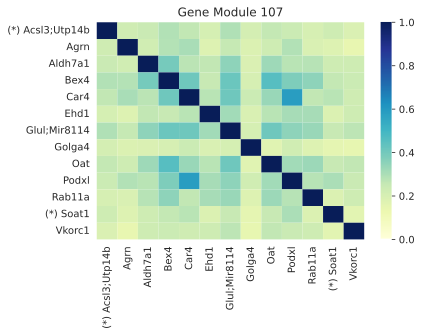

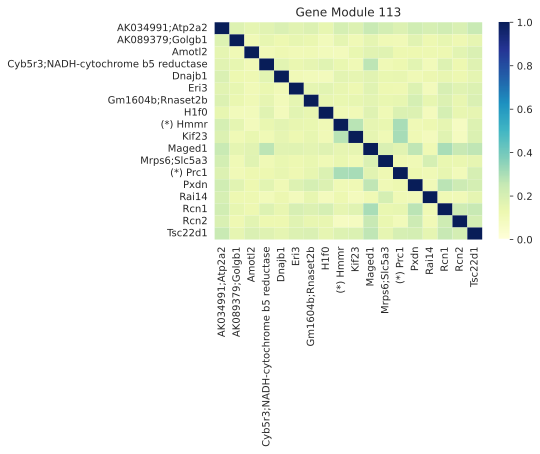

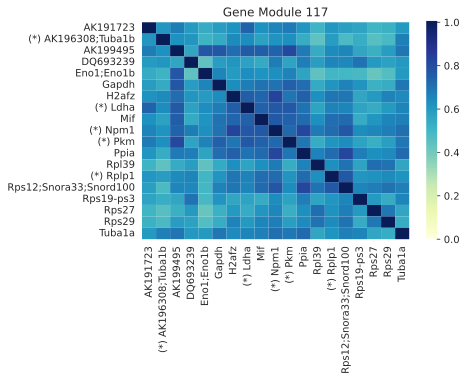

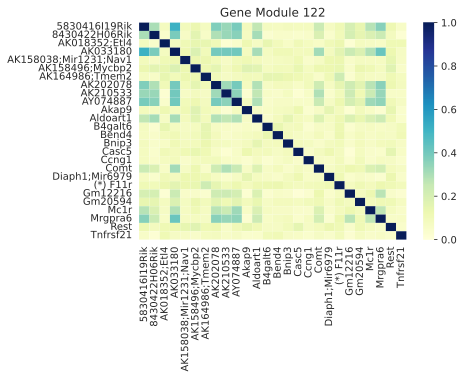

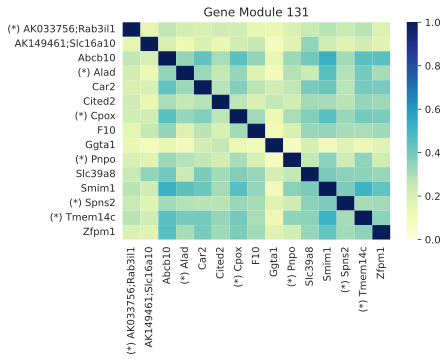

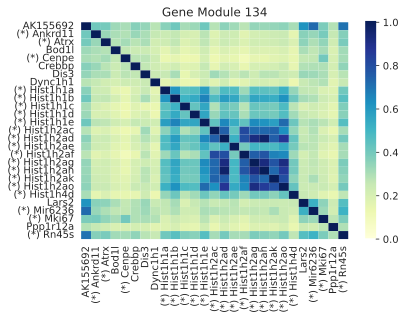

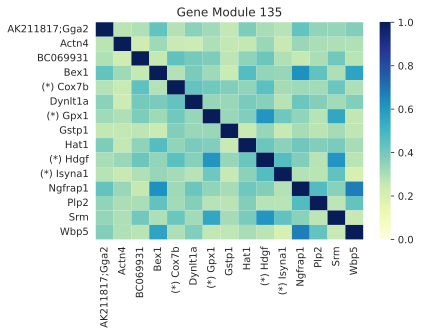

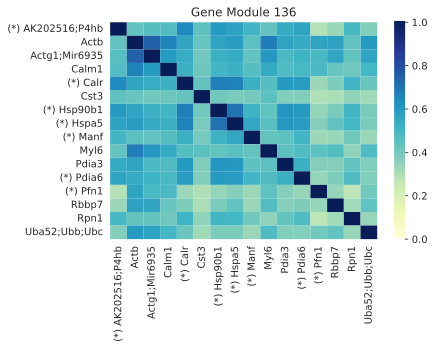

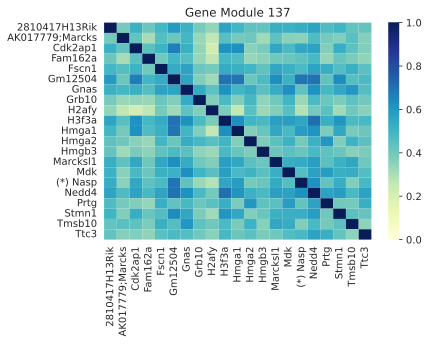

In [25]:
similarity_of_genes = mc.ut.get_vv_frame(clean, 'related_genes_similarity')
for gene_module in suspect_gene_modules:
    module_genes_mask = module_of_genes == gene_module
    similarity_of_module = similarity_of_genes.loc[module_genes_mask, module_genes_mask]
    similarity_of_module.index = \
    similarity_of_module.columns = [
        '(*) ' + name if name in suspect_gene_names else name
        for name in similarity_of_module.index
    ]
    ax = plt.axes()
    sb.heatmap(similarity_of_module, vmin=0, vmax=1, xticklabels=True, yticklabels=True, ax=ax, cmap="YlGnBu")
    ax.set_title(f'Gene Module {gene_module}')
#     plt.savefig('embexe_new_{}.png'.format(gene_module), bbox_inches='tight')
    plt.show()

In [53]:
clean.var_names

Index(['0610005C13Rik', '0610007P14Rik', '0610009B22Rik', '0610009L18Rik',
       '0610009O20Rik', '0610010B08Rik', '0610010B08Rik;Gm4724',
       '0610010F05Rik', '0610010K14Rik;Rnasek', '0610011F06Rik',
       ...
       'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a;AK172452;Raly',
       'abParts;AK002875;AK037822;AK135975;AK156292;Igha;Igh-A (1g2);Ighd;Ighe;Ighg1;Ighg2c;M13680;M25573;M36767;mFLJ00385;Mir7094-2;V00821',
       'abParts;AK036494;M34473', 'l7Rn6'],
      dtype='object', length=21633)

In [34]:
suspect_genes_mask['H19;Mir675']

False

In [35]:
%%time
forbidden_genes_mask = suspect_genes_mask

for gene_module in [8,17,70,72,73,75,88,117,134,135,136]:
    module_genes_mask = module_of_genes == gene_module
    forbidden_genes_mask |= module_genes_mask
forbidden_genes_mask[['Bmp4','H19;Mir675']] = False
forbidden_gene_names = sorted(clean.var_names[forbidden_genes_mask])
print(len(forbidden_gene_names))
print(' '.join(forbidden_gene_names))

363
A2m AA465934;AI450353 AB347871 AB347889 AK021383;Prrc2c AK033756;Rab3il1 AK087340;Eif3a AK155692 AK156288;Tpd52 AK158346;Snrpd2 AK164737;Ell2 AK165270;Rbm25 AK186242 AK186650 AK191723 AK195420 AK196308;Tuba1b AK199495 AK201904 AK202495 AK202516;P4hb AK204572;Eef1a1 AK211817;Gga2 AK217986 AK220016 Acsl3;Utp14b Actb Actg1;Mir6935 Actn4 Akr1b3 Alad Aldoa Ankrd11 Arl6ip1 Atp5j Atrx BC069931 Bex1 Bod1l Bst2 Calm1 Calr Cap1 Cbx7 Ccdc155 Ccnb1 Ccne1 Cdc20 Cenpe Cenpf Chchd10 Chd4;Mir7045 Cks2 Cox10 Cox11 Cox14 Cox15 Cox17 Cox18 Cox19 Cox20 Cox4i1 Cox4i2 Cox5a Cox5b Cox6a1 Cox6a2 Cox6b1 Cox6b2 Cox6c Cox7a1 Cox7a2 Cox7a2l Cox7b Cox7b2 Cox7c Cox8a Cox8c Cpox Crebbp Csf2rb;Mir7676-2 Cst3 DQ555148 DQ693239 DQ714940 Ddx21 Dek Dis3 Dmkn Dsg2 Dut Dync1h1 Dynlt1a Eif5a Eif5b Eno1;Eno1b Eomes Erv3 F11r FW313050 Fblim1 Fech G3bp2 Gapdh Gas5 Glrx5 Gm12338 Gm15772;Rpl26 Gm1821 Gm4737 Gm6402 Gm6548 Gm6654 Gprc5a Gpx1 Gse1 Gstp1 H2afz Hat1 Hba-a2 Hba-x Hbb-b2 Hbb-bh1 Hdac6 Hdgf Hist1h1a Hist1h1b Hist1h1

In [55]:
with open("mc2/embexe_bmp4_og2.lateral_gene_names.csv", "w") as file:
    file.write("gene\n")
    for gene in forbidden_gene_names:
        file.write(f"{gene}\n")

In [36]:
max_parallel_piles = mc.pl.guess_max_parallel_piles(clean)
print(max_parallel_piles)
mc.pl.set_max_parallel_piles(max_parallel_piles)

89


In [37]:
%%time
mc.pl.divide_and_conquer_pipeline(clean,
                                  dissolve_min_robust_size_factor=0.4,
                                  lateral_gene_names=forbidden_gene_names,
                                  target_metacell_size=250000,
                                  random_seed=123)

set embexe_bmp4_og2.clean.var[rare_gene]: 0 true (0%) out of 23450 bools
set embexe_bmp4_og2.clean.var[rare_gene_module]: 23450 int32 elements with all outliers (100%)
set embexe_bmp4_og2.clean.obs[cells_rare_gene_module]: 94757 int32 elements with all outliers (100%)
set embexe_bmp4_og2.clean.obs[rare_cell]: 0 true (0%) out of 94757 bools
set embexe_bmp4_og2.clean.uns[pre_directs]: 10
set embexe_bmp4_og2.clean.uns[directs]: 11
set embexe_bmp4_og2.clean.var[pre_high_total_gene]: 12255 positive (52.26%) out of 23450 int32s
set embexe_bmp4_og2.clean.var[high_total_gene]: 13501 positive (57.57%) out of 23450 int32s
set embexe_bmp4_og2.clean.var[pre_high_relative_variance_gene]: 6654 positive (28.38%) out of 23450 int32s
set embexe_bmp4_og2.clean.var[high_relative_variance_gene]: 6705 positive (28.59%) out of 23450 int32s
set embexe_bmp4_og2.clean.var[lateral_gene]: 363 true (1.548%) out of 23450 bools
set embexe_bmp4_og2.clean.var[bystander_gene]: 0 true (0%) out of 23450 bools
set embexe

CPU times: user 5min 2s, sys: 33.6 s, total: 5min 35s
Wall time: 6min 34s


In [38]:
%%time
metacells = mc.pl.collect_metacells(clean, name='metacells')

set embexe_bmp4_og2.clean.obs[metacell_name]: 94757 <U8s
set metacells.var[excluded_gene]: 0 true (0%) out of 23450 bools
set metacells.var[clean_gene]: 23450 true (100%) out of 23450 bools
set metacells.var[lateral_gene]: 363 true (1.548%) out of 23450 bools
set metacells.var[bystander_gene]: 0 true (0%) out of 23450 bools
set metacells.var[pre_feature_gene]: 1141 positive (4.866%) out of 23450 int32s
set metacells.var[feature_gene]: 1529 positive (6.52%) out of 23450 int32s
set metacells.obs[pile]: 4026 int32s
set metacells.obs[candidate]: 4026 int32s


CPU times: user 12.6 s, sys: 3.1 s, total: 15.7 s
Wall time: 15.7 s


In [39]:
metacells.obs_names

Index(['M0.07', 'M1.00', 'M2.00', 'M3.09', 'M4.09', 'M5.07', 'M6.04', 'M7.08',
       'M8.09', 'M9.00',
       ...
       'M4016.05', 'M4017.02', 'M4018.08', 'M4019.06', 'M4020.01', 'M4021.06',
       'M4022.07', 'M4023.09', 'M4024.03', 'M4025.00'],
      dtype='object', length=4026)

In [40]:
clean.obs.metacell?

In [41]:
#clean.obs.metacell >= 0
clean2 = mc.ut.slice(clean, obs=clean.obs.metacell >= 0)

In [42]:
min(clean2.obs.groupby('metacell').aggregate('count')['properly_sampled_cell'])

12

In [43]:
%%time
mc.pl.compute_umap_by_features(metacells, max_top_feature_genes=1000,
                               min_dist=2.0, random_seed=42)

set metacells.var[top_feature_gene]: 857 true (3.655%) out of 23450 bools
set metacells.obsp[obs_balanced_ranks]: 48642 nonzero (0.3001%) out of 16208676 elements
set metacells.obsp[obs_pruned_ranks]: 16124 nonzero (0.09948%) out of 16208676 elements
set metacells.obsp[obs_outgoing_weights]: 16124 nonzero (0.09948%) out of 16208676 elements
set metacells.obsp[umap_distances]: csr_matrix 4026 X 4026 float32s (16204650 > 0)
/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
set metacells.obs[umap_x]: 4026 float32s
set metacells.obs[umap_y]: 4026 float32s


CPU times: user 3min 19s, sys: 15.8 s, total: 3min 35s
Wall time: 23.5 s


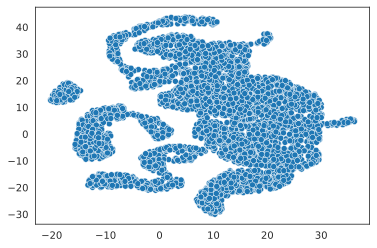

In [44]:
umap_x = mc.ut.get_o_numpy(metacells, 'umap_x')
umap_y = mc.ut.get_o_numpy(metacells, 'umap_y')
plot = sb.scatterplot(x=umap_x, y=umap_y)

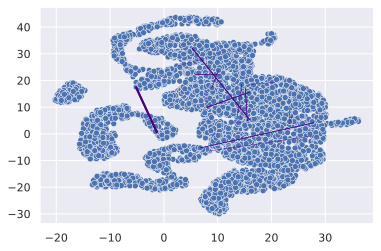

CPU times: user 236 ms, sys: 27.1 ms, total: 263 ms
Wall time: 261 ms


In [45]:
%%time
umap_edges = sp.coo_matrix(mc.ut.get_oo_proper(metacells, 'obs_outgoing_weights'))
min_long_edge_size = 4
sb.set()
plot = sb.scatterplot(x=umap_x, y=umap_y)
for (source_index, target_index, weight) \
        in zip(umap_edges.row, umap_edges.col, umap_edges.data):
    source_x = umap_x[source_index]
    target_x = umap_x[target_index]
    source_y = umap_y[source_index]
    target_y = umap_y[target_index]
    if hypot(target_x - source_x, target_y - source_y) >= min_long_edge_size:
        plt.plot([source_x, target_x], [source_y, target_y],
                 linewidth=weight * 2, color='indigo')
plt.show()

In [46]:
clean.write('mc2/clean_embexe_bmp4_og2.h5ad')
metacells.write('mc2/metacells_embexe_bmp4_og2.h5ad')
# del metacells.uns['__name__']
# metacells.write('for_seurat_ss5.h5ad')

/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'metacell_name' as categorical


In [47]:
data = mc.pl.compute_for_mcview(adata=clean, gdata=metacells)

set metacells.var[significant_gene]: 8563 true (36.52%) out of 23450 bools
set metacells.var[top_feature_gene]: 841 true (3.586%) out of 23450 bools
set metacells.obsp[obs_balanced_ranks]: 48690 nonzero (0.3004%) out of 16208676 elements
set metacells.obsp[obs_pruned_ranks]: 16105 nonzero (0.09936%) out of 16208676 elements
set metacells.obsp[obs_outgoing_weights]: 16105 nonzero (0.09936%) out of 16208676 elements
set metacells.obsp[umap_distances]: csr_matrix 4026 X 4026 float32s (16204650 > 0)
/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
set metacells.obs[umap_x]: 4026 float32s
set metacells.obs[umap_y]: 4026 float32s
set metacells.var[top_feature_gene]: 841 true (3.586%) out of 23450 bools
set metacells.obsp[obs_balanced_ranks]: 48690 nonzero (0.3004%) out of 16208676 elements
set metacells.obsp[

In [48]:
data.write('mc2/outliers_embexe_bmp4_og2.h5ad')
#clean.write('clean_embexe_bmp4_og2.h5ad')
#metacells.write('metacells_embexe_bmp4_og2.h5ad')

In [49]:
adata = ad.read_h5ad("scrna_db_mm10_star/mm_atlas.h5ad")

In [50]:
qdata = metacells

In [51]:
mc.ut.set_name(adata, "atlas.metacells")
mc.ut.set_name(qdata, "query.metacells")

In [52]:
# weights, qdata = mc.pl.projection_pipeline(adata=adata, qdata=qdata, reproducible=True)
weights, qdata = mc.pl.projection_pipeline(adata=adata, qdata=qdata, project_corrections=False, reproducible=True, project_min_similar_essential_genes_fraction=None)

set query.metacells.common.obs[full_metacell_index_of_qdata]: 4026 int64s
set query.metacells.common.var[full_gene_index_of_qdata]: 23025 int64s
set query.metacells.common.obs[common_cell_index_of_qdata]: 4026 int64s
set query.metacells.common.var[common_gene_index_of_qdata]: 23025 int64s
set query.metacells.common.var[correction_factor]: 23025 float32s
set query.metacells.common.var[atlas_gene]: 23025 true (100%) out of 23025 bools
set query.metacells.common.var[atlas_significant_gene]: 7117 true (30.91%) out of 23025 bools
set query.metacells.common.var[ignored_gene]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.included.layers[projected]: ndarray 4026 X 7117 float32s
set query.metacells.common.included.layers[projected_fold]: ndarray 4026 X 7117 float32s
set query.metacells.common.included.var[projected_correlation]: 7117 float32s
set query.metacells.common.included.var[correlated_gene]: 4938 true (69.38%) out of 7117 bools
set query.metacells.common.included.va

set query.metacells.common.Early nascent mesoderm.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Late nascent mesoderm.var[ignored_gene_of_Late nascent mesoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Epiblast.var[ignored_gene_of_Epiblast]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Early nascent mesoderm.var[ignored_gene_of_Early nascent mesoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Chorion progenitors.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Chorion progenitors.var[ignored_gene_of_Chorion progenitors]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.(Missing).included.layers[projected]: ndarray 2 X 7117 float32s
set query.metacells.common.(Missing).included.layers[projected_fold]: ndarray 2 X 7117 float32s
set query.metacells.common.(Missing).included.var[misfit_gene_of_(Missing)]: 3 true (0.04215%) out of 7117 bools
set que

set query.metacells.common.EPC progenitors.included.obs[dissimilar_genes_count]: 1 positive (3.03%) out of 33 int64s
set query.metacells.common.EPC progenitors.included.obs[similar]: 33 true (100%) out of 33 bools
set query.metacells.common.Blood progenitors.included.layers[projected]: ndarray 46 X 7117 float32s
set query.metacells.common.Blood progenitors.included.layers[projected_fold]: ndarray 46 X 7117 float32s
set query.metacells.common.PGC.included.layers[projected]: ndarray 38 X 7117 float32s
set query.metacells.common.Blood progenitors.included.var[misfit_gene_of_Blood progenitors]: 0 true (0%) out of 7117 bools
set query.metacells.common.Blood progenitors.included.obs[dissimilar_genes_count]: 6 positive (13.04%) out of 46 int64s
set query.metacells.common.Blood progenitors.included.obs[similar]: 45 true (97.83%) out of 46 bools
set query.metacells.common.PGC.included.layers[projected_fold]: ndarray 38 X 7117 float32s
set query.metacells.common.PGC.included.var[misfit_gene_of_P

set query.metacells.common.Amnion/Chorion.included.layers[projected]: ndarray 80 X 7117 float32s
set query.metacells.common.Amnion/Chorion.included.layers[projected_fold]: ndarray 80 X 7117 float32s
set query.metacells.common.Amnion/Chorion.included.var[misfit_gene_of_Amnion/Chorion]: 0 true (0%) out of 7117 bools
set query.metacells.common.Amnion/Chorion.included.obs[dissimilar_genes_count]: 14 positive (17.5%) out of 80 int64s
set query.metacells.common.Amnion/Chorion.included.obs[similar]: 69 true (86.25%) out of 80 bools
set query.metacells.common.Visceral endoderm.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Visceral endoderm.var[ignored_gene_of_Visceral endoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.TSC2.included.layers[projected]: ndarray 16 X 7117 float32s
set query.metacells.common.TSC2.included.layers[projected_fold]: ndarray 16 X 7117 float32s
set query.metacells.common.TSC2.included.var[misfit_gene_of_TSC2]: 0 true

set query.metacells.common.Definitive ectoderm.included.layers[projected_fold]: ndarray 117 X 7117 float32s
set query.metacells.common.Tail bud - mesoderm.included.obs[dissimilar_genes_count]: 0 positive (0%) out of 39 int64s
set query.metacells.common.Definitive ectoderm.included.var[misfit_gene_of_Definitive ectoderm]: 0 true (0%) out of 7117 bools
set query.metacells.common.Tail bud - mesoderm.included.obs[similar]: 39 true (100%) out of 39 bools
set query.metacells.common.Definitive ectoderm.included.obs[dissimilar_genes_count]: 4 positive (3.419%) out of 117 int64s
set query.metacells.common.Definitive ectoderm.included.obs[similar]: 117 true (100%) out of 117 bools
set query.metacells.common.Visceral endoderm - anterior.included.layers[projected]: ndarray 19 X 7117 float32s
set query.metacells.common.Visceral endoderm - anterior.included.layers[projected_fold]: ndarray 19 X 7117 float32s
set query.metacells.common.Visceral endoderm - anterior.included.var[misfit_gene_of_Visceral 

set query.metacells.common.Epiblast.included.var[misfit_gene_of_Epiblast]: 0 true (0%) out of 7117 bools
set query.metacells.common.Epiblast.included.obs[dissimilar_genes_count]: 2 positive (0.4237%) out of 472 int64s
set query.metacells.common.Epiblast.included.obs[similar]: 472 true (100%) out of 472 bools
set query.metacells.common.var[misfit_gene_of_(Missing)]: 3 true (0.01303%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_(Missing)]: 15911 true (69.1%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Allantois]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Allantois]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Amnion/Chorion]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Amnion/Chorion]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Amnion/Chorion progenitor]: 0 true (0%) out of 23025 bools
set query

set query.metacells.common.var[misfit_gene_of_Rostral mesoderm]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Rostral mesoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Rostral neural plate]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Rostral neural plate]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Somitic mesoderm]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Somitic mesoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_SpA-TGC]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_SpA-TGC]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_SpT-Gly]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_SpT-Gly]: 15908 true (69.09%) out of 23025 bools
set query.metacells.com

set query.metacells.common.Cardiomyocytes.var[ignored_gene_of_Cardiomyocytes]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Endothelial cells.var[ignored_gene_of_Endothelial cells]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Erythroid 3.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Cardiopharyngeal mesoderm.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Definitive ectoderm.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Erythroid 2.var[ignored_gene_of_Erythroid 2]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Chorion progenitors.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Node/Notochord.var[ignored_gene_of_Node/Notochord]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Blood progenitors.var[ignored_gene_of_Blood progenitors]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common

set query.metacells.common.Presomitic mesoderm.included.obs[similar]: 13 true (100%) out of 13 bools
set query.metacells.common.Rostral neural plate.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Rostral neural plate.var[ignored_gene_of_Rostral neural plate]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.Endothelial cells.included.layers[projected]: ndarray 31 X 7117 float32s
set query.metacells.common.Endothelial cells.included.layers[projected_fold]: ndarray 31 X 7117 float32s
set query.metacells.common.Endothelial cells.included.var[misfit_gene_of_Endothelial cells]: 0 true (0%) out of 7117 bools
set query.metacells.common.Endothelial cells.included.obs[dissimilar_genes_count]: 2 positive (6.452%) out of 31 int64s
set query.metacells.common.Endothelial cells.included.obs[similar]: 31 true (100%) out of 31 bools
set query.metacells.common.Node/Notochord.included.layers[projected]: ndarray 26 X 7117 float32s
set query.metacells.common.No

set query.metacells.common.Neural tube/Floor plate.included.layers[projected_fold]: ndarray 60 X 7117 float32s
set query.metacells.common.Neural tube/Floor plate.included.var[misfit_gene_of_Neural tube/Floor plate]: 0 true (0%) out of 7117 bools
set query.metacells.common.Neural tube/Floor plate.included.obs[dissimilar_genes_count]: 2 positive (3.333%) out of 60 int64s
set query.metacells.common.Neural tube/Floor plate.included.obs[similar]: 60 true (100%) out of 60 bools
set query.metacells.common.Tail bud - neural.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.Tail bud - neural.var[ignored_gene_of_Tail bud - neural]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.SpT-Gly.included.layers[projected]: ndarray 16 X 7117 float32s
set query.metacells.common.Visceral endoderm.var[full_metacell_index_of_qdata]: 23025 int64s
set query.metacells.common.SpT-Gly.included.layers[projected_fold]: ndarray 16 X 7117 float32s
set query.metacells.common.V

set query.metacells.common.Tail bud - mesoderm.included.obs[dissimilar_genes_count]: 0 positive (0%) out of 39 int64s
set query.metacells.common.Tail bud - mesoderm.included.obs[similar]: 39 true (100%) out of 39 bools
set query.metacells.common.Primitive streak.included.layers[projected]: ndarray 88 X 7117 float32s
set query.metacells.common.Primitive streak.included.layers[projected_fold]: ndarray 88 X 7117 float32s
set query.metacells.common.Primitive streak.included.var[misfit_gene_of_Primitive streak]: 0 true (0%) out of 7117 bools
set query.metacells.common.Primitive streak.included.obs[dissimilar_genes_count]: 3 positive (3.409%) out of 88 int64s
set query.metacells.common.Primitive streak.included.obs[similar]: 88 true (100%) out of 88 bools
set query.metacells.common.Visceral endoderm - anterior.included.layers[projected]: ndarray 19 X 7117 float32s
set query.metacells.common.Visceral endoderm - anterior.included.layers[projected_fold]: ndarray 19 X 7117 float32s
set query.met

set query.metacells.common.Late nascent mesoderm.included.obs[dissimilar_genes_count]: 8 positive (4.04%) out of 198 int64s
set query.metacells.common.Late nascent mesoderm.included.obs[similar]: 198 true (100%) out of 198 bools
set query.metacells.common.Early nascent mesoderm.included.layers[projected]: ndarray 212 X 7117 float32s
set query.metacells.common.Early nascent mesoderm.included.layers[projected_fold]: ndarray 212 X 7117 float32s
set query.metacells.common.Early nascent mesoderm.included.var[misfit_gene_of_Early nascent mesoderm]: 0 true (0%) out of 7117 bools
set query.metacells.common.Early nascent mesoderm.included.obs[dissimilar_genes_count]: 13 positive (6.132%) out of 212 int64s
set query.metacells.common.Early nascent mesoderm.included.obs[similar]: 211 true (99.53%) out of 212 bools
set query.metacells.common.Rostral neural plate.included.layers[projected]: ndarray 191 X 7117 float32s
set query.metacells.common.Rostral neural plate.included.layers[projected_fold]: n

set query.metacells.common.var[misfit_gene_of_Lateral & intermediate mesoderm]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Lateral & intermediate mesoderm]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Neural crest]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Neural crest]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Neural plate boundary]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Neural plate boundary]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Neural tube/Floor plate]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Neural tube/Floor plate]: 15908 true (69.09%) out of 23025 bools
set query.metacells.common.var[misfit_gene_of_Node/Notochord]: 0 true (0%) out of 23025 bools
set query.metacells.common.var[ignored_gene_of_Node/Noto

set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ TGC progenitors ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ SpA-TGC ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Erythroid 2 ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ PGC ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion progenitor ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion progenitor ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion progenitor ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ (Missing) ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ PGC ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion progenitor

set query.metacells.common.dissimilar.single.obs[similar]: 1 true (100%) out of 1 bools
set query.metacells.common.dissimilar.single.obs[similar]: 0 true (0%) out of 1 bools
set query.metacells.common.dissimilar.single.layers[projected_fold]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.layers[projected_fold]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[dissimilar_genes_count]: 1 positive (100%) out of 1 int64s
set query.metacells.common.dissimilar.single.obs[dissimilar_genes_count]: 1 positive (100%) out of 1 int64s
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[similar]: 0 true (0%) out of 1 bools
set query.metacells.common.dissimilar.single.obs[similar]: 0 true (0%) out of 1 bools
set query.metacells.common.dissimilar.single.obs[projected_secondary

set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion progenitor ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion progenitor ]
set query.metacells.common.dissimilar.single.layers[projected_fold]: ndarray 1 X 7113 float32s
set query.metacells.common.dissimilar.single.layers[projected]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.obs[dissimilar_genes_count]: 1 positive (100%) out of 1 int64s
set query.metacells.common.dissimilar.single.obs[similar]: 1 true (100%) out of 1 bools
set query.metacells.common.dissimilar.single.layers[projected]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.layers[projected]: ndarray 1 X 7116 float32s
set query.metacells.common.dissimilar.single.layers[projected_fold]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.obs[dissimil

set query.metacells.common.dissimilar.single.obs[projected_type]: [ Cardiopharyngeal mesoderm ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Amnion/Chorion ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Somitic mesoderm ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Paraxial mesoderm ]
set query.metacells.common.dissimilar.single.obs[projected_secondary_type]: [ Neural tube/Floor plate ]
set query.metacells.common.dissimilar.single.obs[projected_type]: [ Tail bud - neural ]
set query.metacells.common.dissimilar.single.layers[projected]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.layers[projected_fold]: ndarray 1 X 7117 float32s
set query.metacells.common.dissimilar.single.obs[dissimilar_genes_count]: 1 positive (100%) out of 1 int64s
set query.metacells.common.dissimilar.single.obs[simil

In [53]:
with open("mc2/embexe_bmp4_og2.query.atlas.weights.csv", "w") as file:
    file.write("query,atlas,weight\n")
    for query_index, atlas_index, in zip(*weights.nonzero()):
        weight = weights[query_index, atlas_index]
        file.write(f"{query_index},{atlas_index},{weight}\n")

In [54]:
qdata.write('mc2/embexe_bmp4_og2_projected.h5ad')

/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'projected_type' as categorical
/home/ofirr/anaconda3/envs/amosbase/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'projected_secondary_type' as categorical


In [46]:
#qdata.obs.index = [i for i,k in enumerate(qdata.obs.index)]